In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [3]:
df_damaged = pd.read_csv('../data/processed/damagedProperty.csv')
df_eviction = pd.read_csv('../data/processed/Eviction.csv')
df_fire = pd.read_csv('../data/processed/fireIncidents.csv')
df_graffiti = pd.read_csv('../data/processed/graffiti.csv')
df_homeless = pd.read_csv('../data/processed/homelessConcerns.csv')
df_illegalp = pd.read_csv('../data/processed/illegalPostings.csv')
df_incidents = pd.read_csv('../data/processed/incidents.csv')
df_noise = pd.read_csv('../data/processed/noiseReports.csv')

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (12,13,14,15,18,19,20,45,46,55,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_assessor = pd.read_csv('../data/processed/assessor_clean.csv')
df_nb_value = pd.read_csv('../data/processed/NeighborhoodValue2.csv')

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_damaged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105799 entries, 0 to 105798
Data columns (total 24 columns):
Unnamed: 0             105799 non-null int64
CaseID                 105799 non-null int64
Opened                 105799 non-null object
Closed                 105026 non-null object
Updated                105799 non-null object
Status                 105799 non-null object
Status Notes           88676 non-null object
Responsible Agency     105799 non-null object
Category               105799 non-null object
Request Type           105799 non-null object
Request Details        105798 non-null object
Address                105799 non-null object
Street                 105799 non-null object
Supervisor District    105799 non-null float64
Neighborhood           105799 non-null object
Police District        105799 non-null object
X                      105799 non-null float64
Y                      105799 non-null float64
Point                  105799 non-null object
Source         

In [6]:
df_eviction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39352 entries, 0 to 39351
Data columns (total 33 columns):
EvictionID              39352 non-null object
Address                 39352 non-null object
City                    39352 non-null object
State                   39352 non-null object
Zipcode                 39352 non-null int64
Date                    39352 non-null object
Nonpayment              39352 non-null bool
Breach                  39352 non-null bool
Nuisance                39352 non-null bool
IllegalUse              39352 non-null bool
FailureToSign           39352 non-null bool
AccessDenial            39352 non-null bool
Unapproved Subtenant    39352 non-null bool
OwnerMoveIn             39352 non-null bool
Demolition              39352 non-null bool
CapitalImprovement      39352 non-null bool
Rehab                   39352 non-null bool
Withdrawl               39352 non-null bool
Condoconversion         39352 non-null bool
Roomate                 39352 non-null bool


In [7]:
df_eviction.rename(columns={'SupervisorDistrict':'Supervisor District'}, inplace=True)

In [8]:
df_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439928 entries, 0 to 439927
Data columns (total 69 columns):
Unnamed: 0                                      439928 non-null int64
Incident Number                                 439928 non-null int64
Exposure Number                                 439928 non-null int64
Address                                         439707 non-null object
Incident Date                                   439928 non-null object
Call Number                                     439928 non-null int64
Alarm DtTm                                      439928 non-null object
Arrival DtTm                                    439928 non-null object
Close DtTm                                      439928 non-null object
City                                            439487 non-null object
Zipcode                                         439912 non-null float64
Battalion                                       439928 non-null object
Station Area                            

## New dataset

In [9]:
data = []

In [10]:
def getEntry(df,categoryName,district):
    entry = {}
    entry["Category"] = categoryName
    entry["Supervisor District"] = district
    entry["2008"] = len(df[(df['Year']==2008) & (df['Supervisor District']==district)])
    entry["2009"] = len(df[(df['Year']==2009) & (df['Supervisor District']==district)])
    entry["2010"] = len(df[(df['Year']==2010) & (df['Supervisor District']==district)])
    entry["2011"] = len(df[(df['Year']==2011) & (df['Supervisor District']==district)])
    entry["2012"] = len(df[(df['Year']==2012) & (df['Supervisor District']==district)])
    entry["2013"] = len(df[(df['Year']==2013) & (df['Supervisor District']==district)])
    entry["2014"] = len(df[(df['Year']==2014) & (df['Supervisor District']==district)])
    entry["2015"] = len(df[(df['Year']==2015) & (df['Supervisor District']==district)])
    entry["2016"] = len(df[(df['Year']==2016) & (df['Supervisor District']==district)])
    entry["2017"] = len(df[(df['Year']==2017) & (df['Supervisor District']==district)])
    return entry
    

In [11]:
def getEntriesDF(data,df,name):
    for i in range(1,12):
        data.append(getEntry(df,name,i))

In [12]:
dataframes = {
    'Damaged Property' : df_damaged,
    'Evictions' : df_eviction,
    'Graffiti' : df_graffiti,
    'Homeless Concerns' : df_homeless,
    'Illegal Postings' : df_illegalp,
    'Noise Concerns' : df_noise}
for name,df in dataframes.items():
    getEntriesDF(data,df,name)

In [13]:
data

[{'Category': 'Damaged Property',
  'Supervisor District': 1,
  '2008': 41,
  '2009': 147,
  '2010': 354,
  '2011': 273,
  '2012': 312,
  '2013': 538,
  '2014': 803,
  '2015': 629,
  '2016': 683,
  '2017': 819},
 {'Category': 'Damaged Property',
  'Supervisor District': 2,
  '2008': 33,
  '2009': 134,
  '2010': 364,
  '2011': 438,
  '2012': 492,
  '2013': 798,
  '2014': 1141,
  '2015': 711,
  '2016': 599,
  '2017': 673},
 {'Category': 'Damaged Property',
  'Supervisor District': 3,
  '2008': 121,
  '2009': 401,
  '2010': 1732,
  '2011': 2066,
  '2012': 2004,
  '2013': 3842,
  '2014': 5446,
  '2015': 2292,
  '2016': 2011,
  '2017': 2026},
 {'Category': 'Damaged Property',
  'Supervisor District': 4,
  '2008': 49,
  '2009': 115,
  '2010': 280,
  '2011': 159,
  '2012': 263,
  '2013': 321,
  '2014': 452,
  '2015': 372,
  '2016': 284,
  '2017': 417},
 {'Category': 'Damaged Property',
  'Supervisor District': 5,
  '2008': 87,
  '2009': 264,
  '2010': 663,
  '2011': 660,
  '2012': 748,
  '201

In [14]:
df = pd.DataFrame(data)
df = df[['Category','Supervisor District','2008','2009','2010','2011','2012','2013','2014','2015',
       '2016','2017']]
df.head()

,Category,Supervisor District,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Damaged Property,1,41,147,354,273,312,538,803,629,683,819
1,Damaged Property,2,33,134,364,438,492,798,1141,711,599,673
2,Damaged Property,3,121,401,1732,2066,2004,3842,5446,2292,2011,2026
3,Damaged Property,4,49,115,280,159,263,321,452,372,284,417
4,Damaged Property,5,87,264,663,660,748,1364,1668,1199,1121,1432


## Count of external factor per district yearly

In [15]:
def factorXdistrict(year,df):
    graph = sns.lmplot(x='Supervisor District', y=year, data=df,
               fit_reg=False, # No regression line
               hue='Category')   # Color by evolution stage
    graph.set_xticklabels(rotation=30)
    path = "../reports/figures/factorsCount" + year
    graph.savefig(path, dpi=300, format="png")

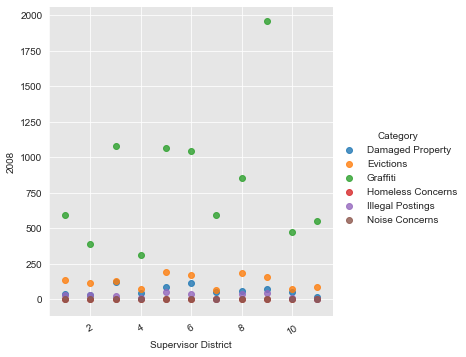

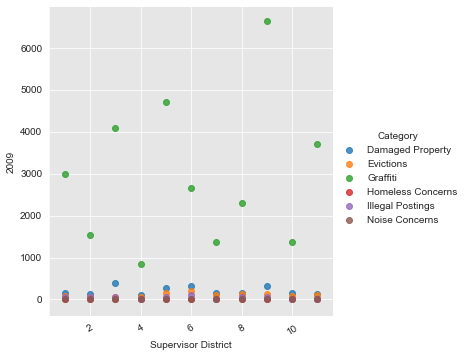

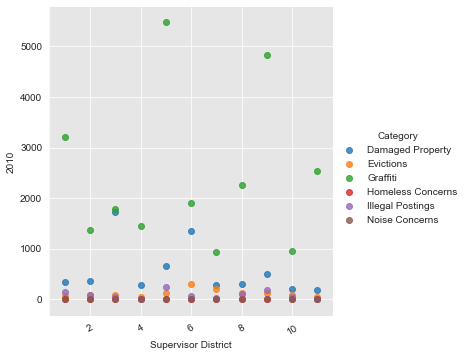

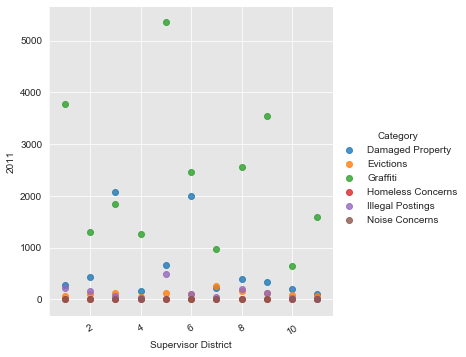

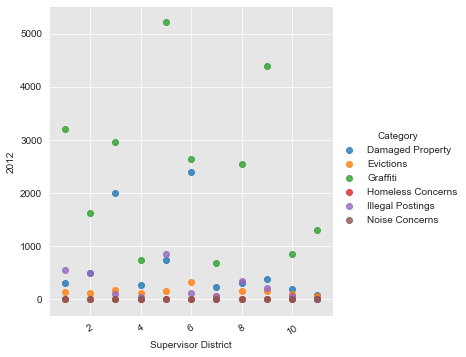

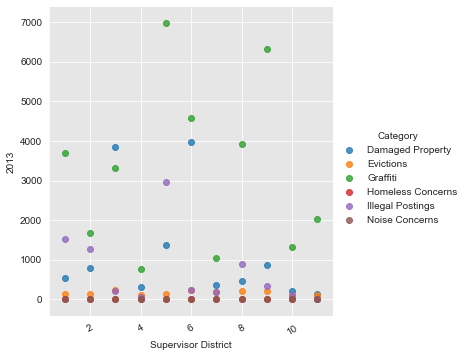

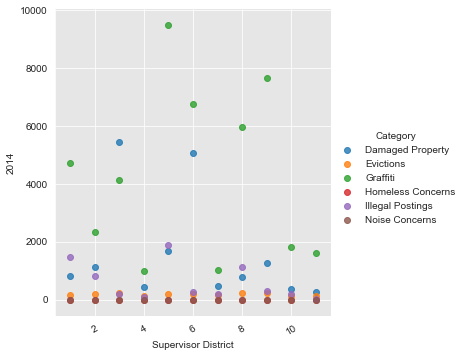

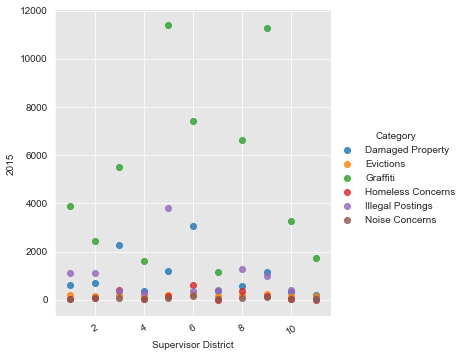

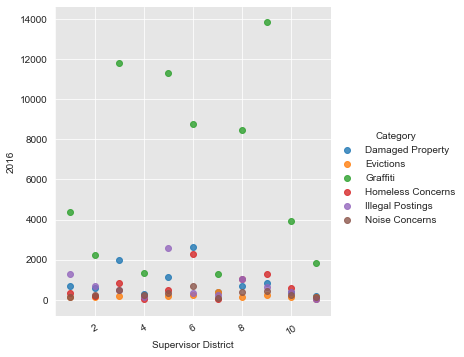

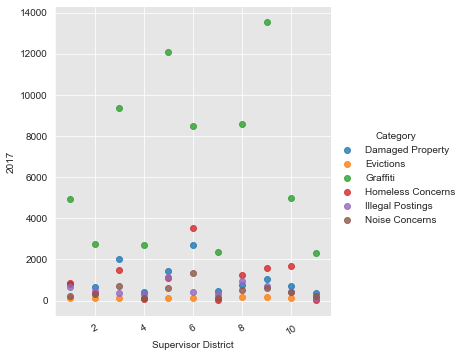

In [16]:
for y in range(2008,2018):
    factorXdistrict(str(y),df)

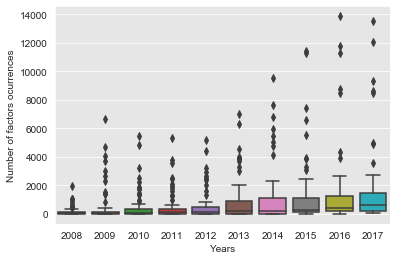

In [24]:
factors = df.drop(['Category','Supervisor District'],axis=1)
graph = sns.boxplot(data=factors)
graph.set_xlabel('Years')
graph.set_ylabel('Number of factors ocurrences')
graph.figure.savefig("../reports/figures/factorsBoxPlot2", dpi=300)

In [18]:
factors.describe()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.00000,66.000000,66.000000,66.000000
mean,171.196970,547.863636,533.469697,529.015152,576.818182,882.318182,1102.50000,1242.272727,1511.136364,1637.287879
std,345.583708,1275.394212,1076.466459,1038.710095,1080.489788,1557.110284,2055.18876,2365.773073,2881.719988,2801.619904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000,22.000000,51.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,108.750000,198.000000,179.000000
50%,39.000000,66.000000,82.000000,102.500000,123.000000,190.500000,188.00000,300.000000,416.500000,602.500000
75%,125.500000,161.250000,341.000000,376.000000,493.500000,890.000000,1099.75000,1150.500000,1244.750000,1461.250000
max,1958.000000,6634.000000,5480.000000,5354.000000,5210.000000,6982.000000,9503.00000,11409.000000,13862.000000,13561.000000


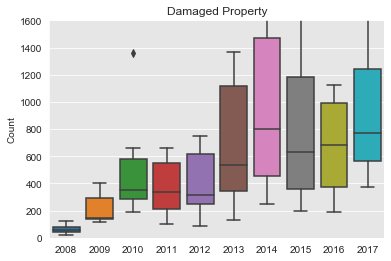

In [19]:
factors = df[df['Category']=='Damaged Property'].drop(['Category','Supervisor District'],axis=1)
graph = sns.boxplot(data=factors)
graph.set_ylabel('Count')
graph.set_title('Damaged Property')
plt.ylim(0, 1600)
path = "../reports/figures/factor_DamagedPropertyCount"
graph.figure.savefig(path, dpi=300, format="png")

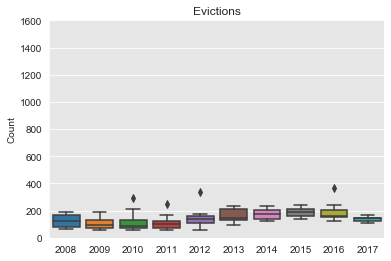

In [20]:
factors = df[df['Category']=='Evictions'].drop(['Category','Supervisor District'],axis=1)
graph = sns.boxplot(data=factors)
graph.set_ylabel('Count')
graph.set_title('Evictions')
plt.ylim(0, 1600)
path = "../reports/figures/factor_EvictionsCount"
graph.figure.savefig(path, dpi=300, format="png")

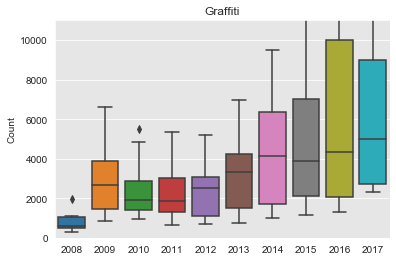

In [21]:
factors = df[df['Category']=='Graffiti'].drop(['Category','Supervisor District'],axis=1)
graph = sns.boxplot(data=factors)
graph.set_ylabel('Count')
graph.set_title('Graffiti')
plt.ylim(0, 11000)
path = "../reports/figures/factor_GraffitiCount"
graph.figure.savefig(path, dpi=300, format="png")

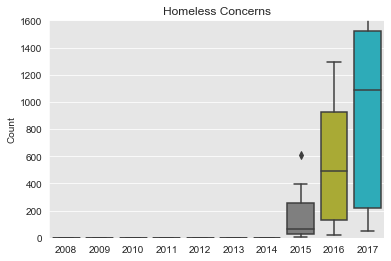

In [22]:
factors = df[df['Category']=='Homeless Concerns'].drop(['Category','Supervisor District'],axis=1)
graph = sns.boxplot(data=factors)
graph.set_ylabel('Count')
graph.set_title('Homeless Concerns')
plt.ylim(0, 1600)
path = "../reports/figures/factor_HomelessConcernsCount"
graph.figure.savefig(path, dpi=300, format="png")

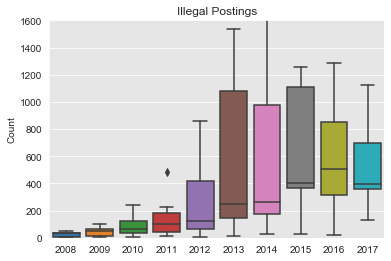

In [23]:
factors = df[df['Category']=='Illegal Postings'].drop(['Category','Supervisor District'],axis=1)
graph = sns.boxplot(data=factors)
graph.set_ylabel('Count')
graph.set_title('Illegal Postings')
plt.ylim(0, 1600)
path = "../reports/figures/factor_IllegalPostingsCount"
graph.figure.savefig(path, dpi=300, format="png")

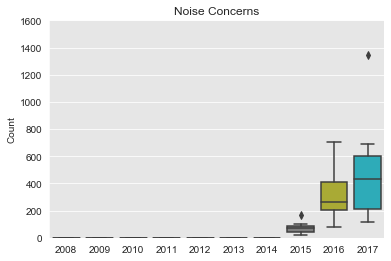

In [24]:
factors = df[df['Category']=='Noise Concerns'].drop(['Category','Supervisor District'],axis=1)
graph = sns.boxplot(data=factors)
graph.set_ylabel('Count')
graph.set_title('Noise Concerns')
plt.ylim(0, 1600)
path = "../reports/figures/factor_NoiseConcernsCount"
graph.figure.savefig(path, dpi=300, format="png")

Putting it all together

In [25]:
melted_df = pd.melt(df,
                   id_vars=["Category","Supervisor District"],
                   var_name="Stat")
melted_df.head()

,Category,Supervisor District,Stat,value
0,Damaged Property,1,2008,41
1,Damaged Property,2,2008,33
2,Damaged Property,3,2008,121
3,Damaged Property,4,2008,49
4,Damaged Property,5,2008,87


//anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


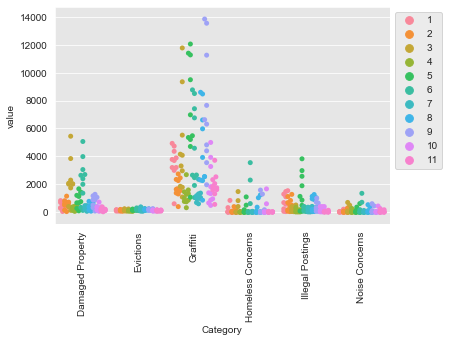

In [26]:
graph = sns.swarmplot(x='Category',
                      y='value',
                      data=melted_df,
                      hue='Supervisor District',
                      split = True)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
graph.legend(bbox_to_anchor=(1,1), loc=2)
graph.figure.savefig("../reports/figures/factorsValueCategory", dpi=300, format="png", bbox_inches='tight')

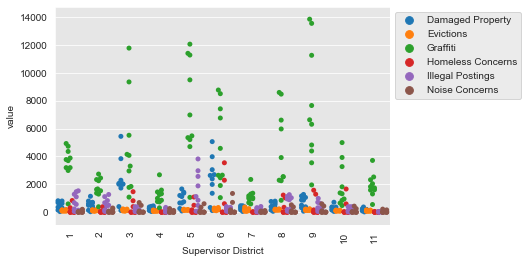

In [27]:
graph = sns.swarmplot(x='Supervisor District',
                      y='value',
                      data=melted_df,
                      hue='Category',
                      split = True)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
graph.legend(bbox_to_anchor=(1,1), loc=2)
graph.figure.savefig( "../reports/figures/factorsValueDistrict", dpi=300, transparent=True, format="png", bbox_inches='tight')

In [28]:
melted_df

,Category,Supervisor District,Stat,value
0,Damaged Property,1,2008,41
1,Damaged Property,2,2008,33
2,Damaged Property,3,2008,121
3,Damaged Property,4,2008,49
4,Damaged Property,5,2008,87
5,Damaged Property,6,2008,116
6,Damaged Property,7,2008,54
7,Damaged Property,8,2008,62
8,Damaged Property,9,2008,72
9,Damaged Property,10,2008,54
